In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

from time import time# timer for debug

    # gather results obtained from the runs
import pickle # open .pkl files where python objects have been saved
from safe import safe # the empty class which is used to save the results
    
    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../Analysis_PSI_EPFL/Runs_22-09-20_J1J2J3pExtremes/'
foldername = '../../Analysis_PSI_EPFL/Runs_29-01-21_J1J2J3pMicroMagVals/'
results_foldername = 'Results_13-02-21'


filenamelist = ['KJ1J2J3p_L4_nsm131972_ncores9_J20.0233_J30_J3st0_folder/backup',
               'KJ1J2J3p_L8_nsm131972_ncores9_J20.0233_J30_J3st0_folder/backup']
filenamelist = ['KJ1J2J3p_LONG_L4_J20.0139_J3p0.009_folder/backup',
                'KJ1J2J3p_LONG_L8_J20.0139_J3p0.009_folder/backup',
                'KJ1J2J3p_LONG_restarted_L12_J20.0139_J3p0.009_folder/backup',
                'KJ1J2J3p_LONG_L4_J20.023_J3p0.01_folder/backup',
                'KJ1J2J3p_LONG_L8_J20.023_J3p0.01_folder/backup',
                'KJ1J2J3p_LONG_restarted_L12_J20.023_J3p0.01_folder/backup',
                'KJ1J2J3p_LONG_L4_J20.119_J3p0.077_folder/backup',
                'KJ1J2J3p_LONG_L8_J20.119_J3p0.077_folder/backup',
                #'KJ1J2J3p_L12_J20.119_J3p0.077_folder/backup',
                'KJ1J2J3p_LONG_restarted_L12_J20.119_J3p0.077_folder/backup'
               ]

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

n = len(filenamelist)

In [4]:
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh,
 stat_hfields, hfields_plots, listfunctions, sref, idswalker] = \
af.LoadParameters(foldername, filenamelist)

print(J3)
print(J4)
s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt)

n = len(L)
failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)])

kw = {'binning': True, 'plzplot': False, 'plotmin': 0, 'plotmax': 16, 'binning_level':4, 'RS':True, 
     'nb_drop':128}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC,\
            t_h_S, t_h_Smin, t_h_Smax, t_h_SE, t_h_SEmin, t_h_SEmax,MergedData] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[t_h_MeanM, t_h_MeanMsq, t_h_varMeanM, t_h_varMeanMsq, Chi, ErrChi] = \
 af.LoadMagnetisation(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

[0.009, 0.009, 0.009, 0.01, 0.01, 0.01, 0.077, 0.077, 0.077]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
nb  [256 256 256 256 256 256 256 256 256] num_in_bin  [128, 128, 128, 128, 128, 128, 128, 128, 128]
Merge runs? False
Group runs by... 1
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  4  -- number of bins:  8
LoadEnergyFromRuns: VarE.shape  (96, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  144
--temperatures (96, 1)
LoadEnergyFromRuns: C.shape  (96, 1)
(256, 2, 96, 1)
CE: CoverT shape  (96, 1)
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Energy
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 

/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 8.881784E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 5.075305E-16
  warnings.warn("Negative variances num error: %E" % err)
/home/jeanne/Documents/Codes/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:749: UserWarning: Negative variances num error: 5.709718E-16
  warnings.warn("Negative variances num error: %E" % err)


(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
LoadEnergyFromRuns: nh  1
No jackknife analysis -- binning level:  4  -- number of bins:  8
LoadEnergyFromRuns: VarE.shape  (96, 1)
LoadEnergyFromRuns: nt matches len(temperatures[nmin])
--numsites[nmin]  1296
--temperatures (96, 1)
LoadEnergyFromRuns: C.shape  (96, 1)
(256, 2, 96, 1)
CE: CoverT shape  (96, 1)
(96, 1)
Load Energy: C[0].shape; before merge (96, 1)
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(128, 96, 1)
(64, 96, 1)
(32, 96, 1)
(16, 96, 1)
Binning...Magnetisation
 bins list for binning:  [128, 64, 32, 16]
(128, 96, 1)
(1

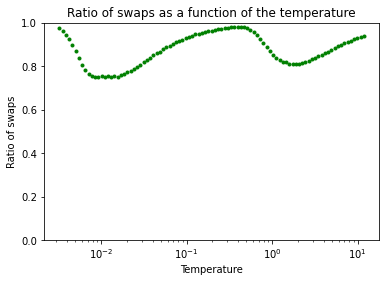

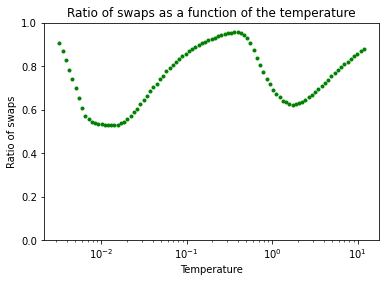

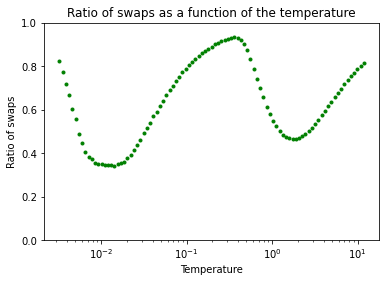

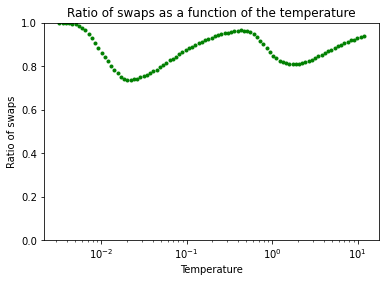

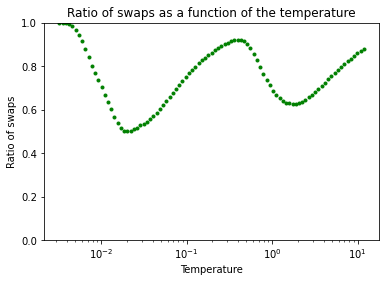

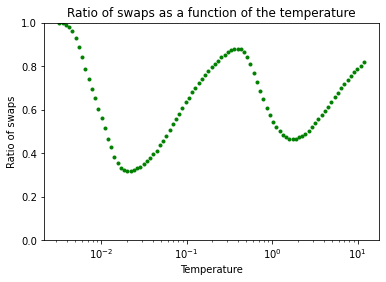

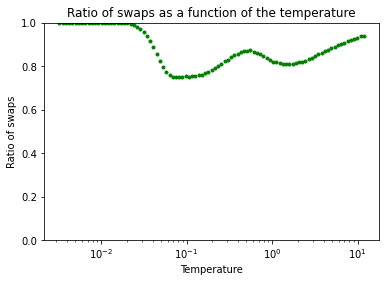

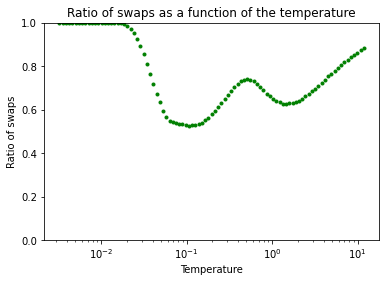

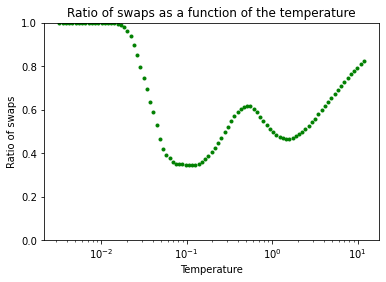

In [5]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

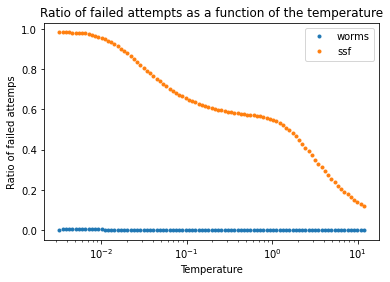

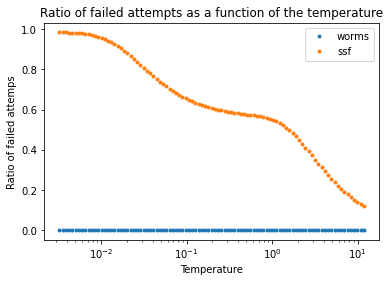

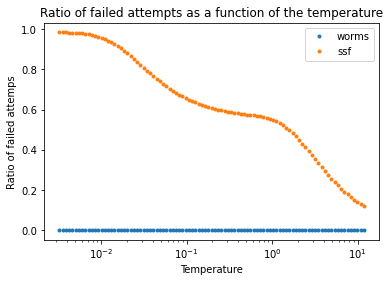

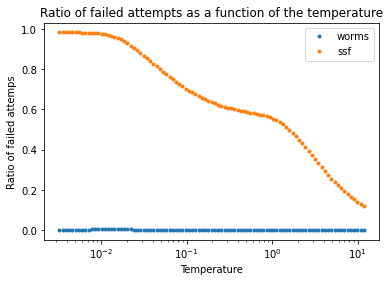

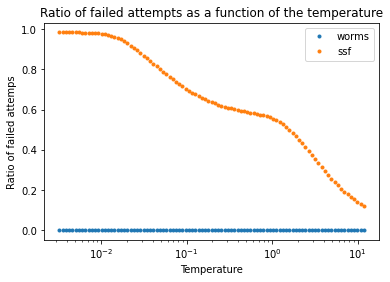

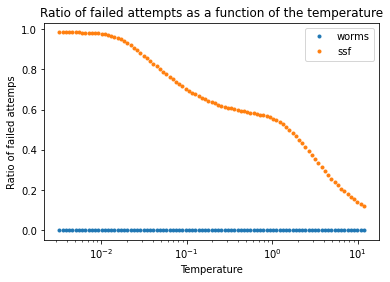

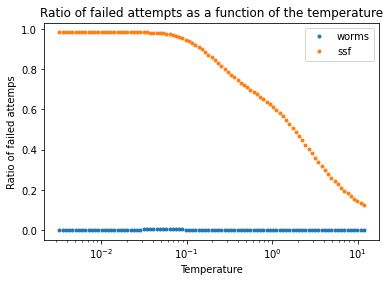

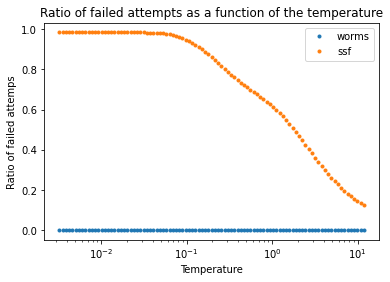

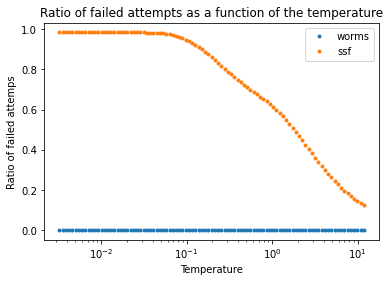

In [6]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [7]:
###########################################
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
### Energy

In [ ]:
############################################
#        ## Energy ANALYSIS ##
############################################
### Energy
S0 = np.log(2)
kw = {'gscheck': False}
for i in range(n):
    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
plt.show()

In [8]:
for i in range(n):
    print("{0}: E_GS-E_0 = ".format(i), t_h_MeanE[i][0,0]+2/3*J1[i] + 2/3*J2[i]-2/3 *J3[i])

0: E_GS-E_0 =  5.416709390498008e-06
1: E_GS-E_0 =  5.607443893245433e-06
2: E_GS-E_0 =  5.639956686036805e-06
3: E_GS-E_0 =  1.6935119150768285e-08
4: E_GS-E_0 =  2.2446087943189807e-08
5: E_GS-E_0 =  3.012299993818135e-08
6: E_GS-E_0 =  3.8164749138758225e-12
7: E_GS-E_0 =  4.215378046623641e-12
8: E_GS-E_0 =  3.2248370640530766e-12


In [9]:
t_h_SE[2][0]

array([0.14917447])

In [10]:
t_h_SEmin[2][0]

array([0.14798376])

In [11]:
t_h_SEmax[2][0]

array([0.15036519])

In [12]:
t_h_SE[5][0]

array([0.14851284])

In [13]:
t_h_SE[6][0]

array([0.14256416])

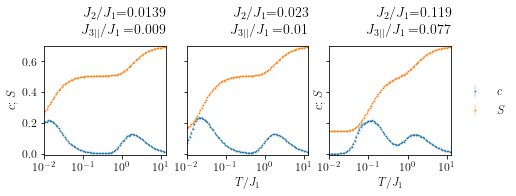

In [20]:
figsize = (7,2.75)
fig, [ax1, ax2,ax3] = plt.subplots(1,3, sharex = True, sharey = True, figsize = figsize)
ivals = [0,1,2]
axes = [ax1,ax2,ax3]
tmin = 0
hid = 0
markersize = 1.5
for axi, i in enumerate(ivals[0:3]):

    j = 3*i
    addtitle = r"$J_2/J_1$={0}".format(J2[j]/J1[j]) + "\n" + r"$J_{3||}/J_1=$" + "{0}".format(J3[j]/J1[j])
    #axes[axi].errorbar(temperatures_plots[j][tmin:],C[j][tmin:,hid],yerr = ErrC[j][tmin:,hid],
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_SE[j][tmin:,hid],yerr = t_h_SEmax[j][tmin:,hid]-t_h_SEmin[j][tmin:,hid],
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].set_prop_cycle(None)
    j = 3*i +1
    axes[axi].errorbar(temperatures_plots[j][tmin:],C[j][tmin:,hid],yerr = ErrC[j][tmin:,hid],
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_SE[j][tmin:,hid],yerr = t_h_SEmax[j][tmin:,hid]-t_h_SEmin[j][tmin:,hid],
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].set_prop_cycle(None)
    j = 3*i +2
    #axes[axi].errorbar(temperatures_plots[j][tmin:],C[j][tmin:,hid],yerr = ErrC[j][tmin:,hid],
    #            fmt = '--', linewidth = 0.3, markersize = markersize, label = '$c$')
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_SE[j][tmin:,hid],yerr = t_h_SEmax[j][tmin:,hid]-t_h_SEmin[j][tmin:,hid],
    #            fmt = '--', linewidth = 0.3, markersize = markersize, label = '$S$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],C[j][tmin:,hid],yerr = ErrC[j][tmin:,hid],
                fmt = '.', linewidth = 0.3, markersize = markersize, label = '$c$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_SE[j][tmin:,hid],yerr = t_h_SEmax[j][tmin:,hid]-t_h_SEmin[j][tmin:,hid],
                fmt = '.', linewidth = 0.3, markersize = markersize, label = '$S$')
    #
    axes[axi].set_xscale('log')
    if (axi+1)//len(ivals) == 1 or (axi+2)//len(ivals) == 1:
        axes[axi].set_xlabel(r'$T/J_1$')    

    axes[axi].text(1, 1.35, addtitle,horizontalalignment='right',  transform=axes[axi].transAxes, fontsize=14,
    verticalalignment='top')
    
plt.xlim([0.01, 13])
plt.ylim([-0.01, np.log(2)+0.01])
plt.xticks([0.01,0.1,1,10])
#plt.legend(loc = 'upper center', ncol = 4)
axes[0].set_ylabel(r"$c$; $S$")
axes[2].set_ylabel(r"$c$; $S$")
plt.legend(loc = 'center left', bbox_to_anchor= (1.01,0.5), frameon = False)
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=0.5,rect = (0,0,1,1))
plt.savefig("./" + foldername + results_foldername + "/OverviewSpecificHeat_J2J3pValuesMatching.pdf")

In [ ]:
############################################
#        ## MAGNETISATION ANALYSIS ##
############################################
#for i in range(n):
#    af.BasicPlotsM(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanM, t_h_MeanMsq, t_h_varMeanM,
#                    t_h_varMeanMsq, Chi, ErrChi, J1, J2, J3, J4, **kw)
#plt.show()

In [15]:
rmmag = True
kw = {'rmmag':rmmag,'binning': True, 'plzplot':False}

In [16]:
t_h_MeanFc, t_h_varMeanFc= \
 af.LoadFirstCorrelations(foldername, filenamelist, listfunctions,stat_temps,
                          stat_hfields, nb,t_h_MeanM,t_h_varMeanMsq, **kw)

Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 96, 1, 4)
(256, 96, 1, 4)
(128, 96, 1, 4)
(64, 96, 1, 4)
(32, 96, 1, 4)
(16, 96, 1, 4)
[3.79326200e-17 3.63549786e-10 3.63159111e-10 2.21649137e-07]
(96, 1, 4)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 96, 1, 4)
(256, 96, 1, 4)
(128, 96, 1, 4)
(64, 96, 1, 4)
(32, 96, 1, 4)
(16, 96, 1, 4)
[3.79326200e-17 8.52686829e-11 8.88018714e-11 1.37221267e-07]
(96, 1, 4)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 96, 1, 4)
(256, 96, 1, 4)
(128, 96, 1, 4)
(64, 96, 1, 4)
(32, 96, 1, 4)
(16, 96, 1, 4)
[3.79326200e-17 8.44566469e-11 8.48884990e-11 2.55547533e-07]
(96, 1, 4)
Binning...FirstCorrelations
 bins list for binning:  [256, 128, 64, 32, 16]
(256, 96, 1, 4)
(256, 96, 1, 4)
(128, 96, 1, 4)
(64, 96, 1, 4)
(32, 96, 1, 4)
(16, 96, 1, 4)
[3.79326200e-17 3.79326200e-17 5.34733042e-13 2.56116726e-07]
(96, 1, 4)
Binning...FirstCorrelations
 bin

In [ ]:
#t_h_MeanSs, t_h_varMeanSs, t_h_MeanSi, t_h_varMeanSi, t_h_MeanCorr, t_h_errCorrEstim = \
# af.LoadCentralCorrelations(foldername, filenamelist, listfunctions, sref, stat_temps, stat_hfields, nb, **kw)
#print(t_h_errCorrEstim[0].shape)

In [ ]:
#for i in range(n):
#    addsave = "L={0} ".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
#    addtitle = r"$L$={0}".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
#    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
#                                   t_h_varMeanFc, foldername, 
#                                   results_foldername, filenamelist,
#                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
#                                   addsave = addsave,
#                                   addtitle = addtitle)

In [17]:
# Introducing the experimental values for the plots below:
## <sisj>-<si><sj>:
NN1exp = -0.218;
NN1experr = 0.005;
NN1Lexperr = 0.021;

NN2exp = 0.021;
NN2experr = 0.004;
NN2Lexperr = 0.018;

NN3pexp = 0.063;
NN3pexperr = 0.005;
NN3pLexperr = 0.023;

NN3sexp = -0.003;
NN3sexperr = 0.005;
NN3sLexperr = 0.023;

mexp = -0.193;

rmexpmag = True

if not rmexpmag:
    NN1exp += mexp**2;
    NN2exp += mexp**2;
    NN3pexp += mexp**2;
    NN3sexp += mexp**2;
    

print(NN1exp)
print(NN2exp)
print(NN3pexp)
print(NN3sexp)

-0.218
0.021
0.063
-0.003


In [18]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12, 'weight':'bold'})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v330.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/home/jeanne/miniconda3/envs/minimal/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf'

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


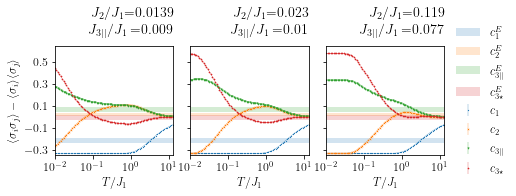

In [21]:
figsize = (7,2.75)
fig, [ax1, ax2,ax3] = plt.subplots(1,3, sharex = True, sharey = True, figsize = figsize)
ivals = [0,1,2]
axes = [ax1,ax2,ax3]
tmin = 0
hid = 0
markersize = 1.5
for axi, i in enumerate(ivals[0:3]):
    
    j = 3*i
    addtitle = r"$J_2/J_1$={0}".format(J2[j]/J1[j]) + "\n" + r"$J_{3||}/J_1=$" + "{0}".format(J3[j]/J1[j])
    print(axes[axi])
    #axes[axi].plot([0,1],[0,0])
   
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,0],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,1],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,2],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,3],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = ':', linewidth = 0.3, markersize = markersize)
    #axes[axi].set_prop_cycle(None)
    j = 3*i+1
    addtitle = r"$J_2/J_1$={0}".format(J2[j]/J1[j]) + "\n" + r"$J_{3||}/J_1=$" + "{0}".format(J3[j]/J1[j])
    print(axes[axi])
    #axes[axi].plot([0,1],[0,0])
   
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,0],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,1],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,2],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,3],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '-', linewidth = 0.3, markersize = markersize)
    axes[axi].set_prop_cycle(None)
    j = 3*i +2
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,0],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = '--',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_1$')
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,1],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = '--',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_2$')
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,2],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = '--',linewidth = 0.3,mew= 0.5,markersize = markersize,label = r'$c_{3||}$')
    #axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,3],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
    #            fmt = '--',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_{3\star}$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,0],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '.',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_1$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,1],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = 'x',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_2$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,2],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = 'v',linewidth = 0.3,mew= 0.5,markersize = markersize,label = r'$c_{3||}$')
    axes[axi].errorbar(temperatures_plots[j][tmin:],t_h_MeanFc[j][tmin:,hid,3],yerr = np.sqrt(t_h_varMeanFc[j][tmin:,hid,0]),
                fmt = '*',linewidth = 0.3,mew = 0.5,markersize = markersize,label = r'$c_{3\star}$')
    axes[axi].text(1, 1.35, addtitle,horizontalalignment='right',  transform=axes[axi].transAxes, fontsize=14,
    verticalalignment='top')

    axes[axi].set_xscale('log')
    #if (axi+1)//len(ivals) == 1 or (axi+2)//len(ivals) == 1:
    axes[axi].set_xlabel(r'$T/J_1$')
    axes[axi].set_xticks([0.01, 0.1, 1,10])
    axes[axi].set_prop_cycle(None)
    axes[axi].fill_between([1e-3,13],[NN1exp-NN1Lexperr,NN1exp-NN1Lexperr],[NN1exp+NN1Lexperr, NN1exp+NN1Lexperr], alpha = 0.2, label = r'$c_1^{E}$')
    axes[axi].fill_between([1e-3,13],[NN2exp-NN2Lexperr,NN2exp-NN2Lexperr],[NN2exp+NN2Lexperr, NN2exp+NN2Lexperr], alpha = 0.2, label = r'$c_2^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3pexp-NN3pLexperr,NN3pexp-NN3pLexperr],[NN3pexp+NN3pLexperr, NN3pexp+NN3pLexperr], alpha = 0.2, label = r'$c_{3||}^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3sexp-NN3sLexperr, NN3sexp-NN3sLexperr],[NN3sexp+NN3sLexperr, NN3sexp+NN3sLexperr], alpha = 0.2, label = r'$c_{3\star}^{E}$')
    

#
plt.xlim([0.01, 13])
plt.ylim([-0.35, 0.65])
plt.yticks(np.arange(-0.3,0.7,0.2))
#plt.legend(loc = 'upper center', ncol = 4)
axes[0].set_ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    
plt.legend(loc = 'center left', bbox_to_anchor= (1.01,0.5), frameon = False)
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=0.5,rect = (0,0,1,1))
plt.savefig("./" + foldername + results_foldername + "/OverviewFirstCorrelations_J2J3pValuesMatching.pdf")

In [ ]:
figsize = (7,2.5)
fig, [ax1, ax2,ax3] = plt.subplots(1,3, sharex = True, sharey = True, figsize = figsize)
ivals = [0,1,2]
axes = [ax1,ax2,ax3]
for axi, i in enumerate(ivals[0:3]):
    addtitle = r"$J_2/J_1$={0}".format(J2[i]/J1[i])
    print(axes[axi])
    #axes[axi].plot([0,1],[0,0])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,
                                   save = False, figsize = figsize, dpi = 300, 
                                   createfig = False, ax = axes[axi], markersize = 1, alpha = 0.5)
    
    axes[axi].text(0.95, 0.95, addtitle,horizontalalignment='right',  transform=axes[axi].transAxes, fontsize=14,
        verticalalignment='top')

    if axi%3 == 0:
            axes[axi].set_ylabel(r"$\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle$")
    #if (axi+1)//len(ivals) == 1 or (axi+2)//len(ivals) == 1:
    axes[axi].set_xlabel(r'$T/J_1$')
    
    axes[axi].set_prop_cycle(None)
    axes[axi].fill_between([1e-3,13],[NN1exp-NN1Lexperr,NN1exp-NN1Lexperr],[NN1exp+NN1Lexperr, NN1exp+NN1Lexperr], alpha = 0.2, label = r'$c_1^{E}$')
    axes[axi].fill_between([1e-3,13],[NN2exp-NN2Lexperr,NN2exp-NN2Lexperr],[NN2exp+NN2Lexperr, NN2exp+NN2Lexperr], alpha = 0.2, label = r'$c_2^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3pexp-NN3pLexperr,NN3pexp-NN3pLexperr],[NN3pexp+NN3pLexperr, NN3pexp+NN3pLexperr], alpha = 0.2, label = r'$c_{3||}^{E}$')
    axes[axi].fill_between([1e-3,13],[NN3sexp-NN3sLexperr, NN3sexp-NN3sLexperr],[NN3sexp+NN3sLexperr, NN3sexp+NN3sLexperr], alpha = 0.2, label = r'$c_{3\star}^{E}$')
    axes[axi].grid(which = 'both', linestyle = '--', alpha = 0.3)
    

#
plt.xlim([0.01, 13])
plt.ylim([-0.35, 0.65])
plt.yticks(np.arange(-0.3,0.7,0.2))
#plt.legend(loc = 'upper center', ncol = 4)
plt.legend(loc = 'center left', bbox_to_anchor = (1.01,0.5), frameon = False)
plt.tight_layout
plt.savefig("./" + foldername + results_foldername + "/OverviewFirstCorrelations_J2J3pValuesMatching.pdf")

In [ ]:
for i in range(n):
    addsave = "L={0}".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0} ".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,markersize=4,
                                   save = False)
    plt.gca().set_prop_cycle(None)
    Tmin = min(temperatures_plots[i])
    Tmax = max(temperatures_plots[i])
    plt.fill_between([Tmin,Tmax],[NN1exp-NN1experr,NN1exp-NN1experr],[NN1exp+NN1experr, NN1exp+NN1experr], alpha = 0.2, label = r'$c_1^{E}$')
    plt.fill_between([Tmin,Tmax],[NN2exp-NN2experr,NN2exp-NN2experr],[NN2exp+NN2experr, NN2exp+NN2experr], alpha = 0.2,  label = r'$c_2^{E}$')
    plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexperr,NN3pexp-NN3pexperr],[NN3pexp+NN3pexperr, NN3pexp+NN3pexperr], alpha = 0.2,  label = r'$c_{3||}^{E}$')
    plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexperr, NN3sexp-NN3sexperr],[NN3sexp+NN3sexperr, NN3sexp+NN3sexperr], alpha = 0.2,label = r'$c_{3\star}^{E}$')
    plt.xlim([0.001, 13])
    plt.ylim([-0.35, 0.35])
    plt.yticks(np.arange(-0.35,0.3,0.05))
    plt.legend(loc = 'lower left')
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [ ]:
for i in range(n):
    addsave = "L={0}".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0} ".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    af.BasicPlotsFirstCorrelations(L, i, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.3,0.7,0.1),
                                   addtitle = addtitle,markersize=4,
                                   save = False)
    plt.gca().set_prop_cycle(None)
    Tmin = min(temperatures_plots[i])
    Tmax = max(temperatures_plots[i])
    plt.fill_between([Tmin,Tmax],[NN1exp-NN1expdev,NN1exp-NN1expdev],[NN1exp+NN1expdev, NN1exp+NN1expdev], alpha = 0.2, label = r'$c_1^{E}$')
    plt.fill_between([Tmin,Tmax],[NN2exp-NN2expdev,NN2exp-NN2expdev],[NN2exp+NN2expdev, NN2exp+NN2expdev], alpha = 0.2,  label = r'$c_2^{E}$')
    plt.fill_between([Tmin,Tmax],[NN3pexp-NN3pexpdev,NN3pexp-NN3pexpdev],[NN3pexp+NN3pexpdev, NN3pexp+NN3pexpdev], alpha = 0.2,  label = r'$c_{3||}^{E}$')
    plt.fill_between([Tmin,Tmax],[NN3sexp-NN3sexpdev, NN3sexp-NN3sexpdev],[NN3sexp+NN3sexpdev, NN3sexp+NN3sexpdev], alpha = 0.2,label = r'$c_{3\star}^{E}$')
    plt.xlim([0.01, 13])
    plt.ylim([-0.35, 0.35])
    plt.yticks(np.arange(-0.35,0.3,0.05))
    plt.legend(loc = 'lower left')
    plt.savefig("./" + foldername + results_foldername + "/FirstCorrelations_Zoom" + addsave +"rmexpmag={0}.png".format(rmexpmag))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (11,9), dpi = 200)
markersize = 4
af.BasicPlotsFirstCorrelations(L, 0, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax, markersize = markersize)
af.BasicPlotsFirstCorrelations(L, 1, t_h_MeanFc, temperatures_plots, 
                                   t_h_varMeanFc, foldername, 
                                   results_foldername, filenamelist,
                                   tmin = 0, setyticks = np.arange(-0.4,0.7,0.1),
                                   addsave = addsave,
                                   addtitle = addtitle, createfig = False, ax = ax, markersize = markersize//2)

In [ ]:
for i in range(n):
    addsave = "L={0}".format(L[i]) + "J2ovJ1" +"={0}".format(J2[i]/J1[i]) + "J3povJ1" +"={0}".format(J3[i]/J1[i])  + "J3sovJ1" +"={0}".format(J3st[i]/J1[i])
    addtitle = r"$L$={0} ".format(L[i])+r"$J_2/J_1$={0}".format(J2[i]/J1[i]) + r"  $J_{3||}/J_1$" + "={0}".format(J3[i]/J1[i]) +r"  $J_{3\star}/J_1$"+"={0}".format(J3st[i]/J1[i])
    
    figsize=(11,9)
    dpi = 200
    tmin = 0
    tmax = 192
    plt.figure(figsize=figsize, dpi = dpi)
    plt.semilogx(temperatures_plots[i][tmin:tmax],t_h_MeanFc[i][tmin:tmax,0,1]-t_h_MeanFc[i][tmin:tmax,0,2],'k.',label = r'$c_2$ - $c_{3||}$')
    plt.fill_between(temperatures_plots[i][tmin:tmax],
                    t_h_MeanFc[i][tmin:tmax,0,1]-t_h_MeanFc[i][tmin:tmax,0,2]-2*np.sqrt(t_h_varMeanFc[i][tmin:,0,2]),
                    t_h_MeanFc[i][tmin:tmax,0,1]-t_h_MeanFc[i][tmin:tmax,0,2]+2*np.sqrt(t_h_varMeanFc[i][tmin:,0,2]), color = 'k', alpha = 0.2)
    plt.title(addtitle)
    plt.xlabel(r"$T/J_1$")
    plt.ylabel(r"$\Delta(\langle \sigma_i \sigma_j \rangle - \langle \sigma_i \rangle \langle \sigma_j \rangle)$")
    plt.grid(which='both')
    plt.legend()